In [1]:
# Time Series Data ... 
# 1. One of the axis of data is Time 
# 2. 

In [2]:
# To unzip a file - if you are on Windows right click and extract 
# If you are on Colab 
! unzip GlobalLandTemperaturesByMajorCity.csv.zip

Archive:  GlobalLandTemperaturesByMajorCity.csv.zip
  inflating: GlobalLandTemperaturesByMajorCity.csv  


In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
df = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv", squeeze=True)

In [6]:
df.head()

dt  AverageTemperature  ...  Latitude Longitude
0  1849-01-01              26.704  ...     5.63N     3.23W
1  1849-02-01              27.434  ...     5.63N     3.23W
2  1849-03-01              28.101  ...     5.63N     3.23W
3  1849-04-01              26.140  ...     5.63N     3.23W
4  1849-05-01              25.427  ...     5.63N     3.23W

[5 rows x 7 columns]

In [7]:
df.shape

(239177, 7)

In [8]:
df.Country.unique()

array(["Côte D'Ivoire", 'Ethiopia', 'India', 'Syria', 'Egypt', 'Turkey',
       'Iraq', 'Thailand', 'Brazil', 'Germany', 'Colombia',
       'South Africa', 'Morocco', 'China', 'United States', 'Senegal',
       'Tanzania', 'Bangladesh', 'Pakistan', 'Zimbabwe', 'Vietnam',
       'Nigeria', 'Indonesia', 'Saudi Arabia', 'Afghanistan', 'Ukraine',
       'Congo (Democratic Republic Of The)', 'Peru', 'United Kingdom',
       'Angola', 'Spain', 'Philippines', 'Iran', 'Australia', 'Mexico',
       'Somalia', 'Canada', 'Russia', 'Japan', 'Kenya', 'France', 'Burma',
       'Italy', 'Chile', 'Dominican Republic', 'South Korea', 'Singapore',
       'Taiwan', 'Sudan'], dtype=object)

In [11]:
df.groupby(["Country", "City"]).size()

Country        City            
Afghanistan    Kabul               2169
Angola         Luanda              1893
Australia      Melbourne           2073
               Sydney              2073
Bangladesh     Dhaka               2613
                                   ... 
United States  Chicago             3239
               Los Angeles         1977
               New York            3239
Vietnam        Ho Chi Minh City    2265
Zimbabwe       Harare              1965
Length: 100, dtype: int64

In [12]:
df_usa = df.loc[df.Country == "United States"]

In [13]:
df_usa.head()

dt  AverageTemperature  ...  Latitude Longitude
51674  1743-11-01               5.436  ...    42.59N    87.27W
51675  1743-12-01                 NaN  ...    42.59N    87.27W
51676  1744-01-01                 NaN  ...    42.59N    87.27W
51677  1744-02-01                 NaN  ...    42.59N    87.27W
51678  1744-03-01                 NaN  ...    42.59N    87.27W

[5 rows x 7 columns]

In [18]:
df_usa.shape

(8455, 7)

In [15]:
df_usa.City.unique()

array(['Chicago', 'Los Angeles', 'New York'], dtype=object)

In [16]:
df_usa.City.value_counts()

Chicago        3239
New York       3239
Los Angeles    1977
Name: City, dtype: int64

In [17]:
df_usa.isna().sum()

dt                                 0
AverageTemperature               218
AverageTemperatureUncertainty    218
City                               0
Country                            0
Latitude                           0
Longitude                          0
dtype: int64

In [21]:
df_usa.loc[df_usa.AverageTemperature.isna()].City.value_counts()

New York    120
Chicago      98
Name: City, dtype: int64

In [22]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8455 entries, 51674 to 173007
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             8455 non-null   object 
 1   AverageTemperature             8237 non-null   float64
 2   AverageTemperatureUncertainty  8237 non-null   float64
 3   City                           8455 non-null   object 
 4   Country                        8455 non-null   object 
 5   Latitude                       8455 non-null   object 
 6   Longitude                      8455 non-null   object 
dtypes: float64(2), object(5)
memory usage: 528.4+ KB


In [24]:
df_usa["dt"] = pd.to_datetime(df_usa.dt)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8455 entries, 51674 to 173007
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             8455 non-null   datetime64[ns]
 1   AverageTemperature             8237 non-null   float64       
 2   AverageTemperatureUncertainty  8237 non-null   float64       
 3   City                           8455 non-null   object        
 4   Country                        8455 non-null   object        
 5   Latitude                       8455 non-null   object        
 6   Longitude                      8455 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 528.4+ KB


In [27]:
# df_usa.dt.dt.month -> dataFrame.column_name.dt.month
df_usa["month"] = df_usa.dt.dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_usa.head()

dt  AverageTemperature  ...  Longitude month
51674 1743-11-01               5.436  ...     87.27W    11
51675 1743-12-01                 NaN  ...     87.27W    12
51676 1744-01-01                 NaN  ...     87.27W     1
51677 1744-02-01                 NaN  ...     87.27W     2
51678 1744-03-01                 NaN  ...     87.27W     3

[5 rows x 8 columns]

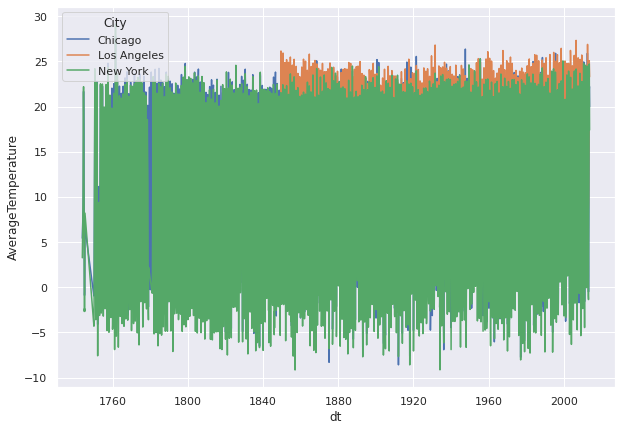

In [48]:
plt.figure(figsize=(10, 7))
sns.lineplot(x="dt", y="AverageTemperature", data=df_usa, hue="City")

In [33]:
# To better visualize the data we group the data and then mean it
df_usa["year"] = df_usa.dt.dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
df_usa.head()

dt  AverageTemperature  ...  month  year
51674 1743-11-01               5.436  ...     11  1743
51675 1743-12-01                 NaN  ...     12  1743
51676 1744-01-01                 NaN  ...      1  1744
51677 1744-02-01                 NaN  ...      2  1744
51678 1744-03-01                 NaN  ...      3  1744

[5 rows x 9 columns]

In [41]:
df_usa_grouped = df_usa.groupby(["City", "year", "month"]).mean().reset_index()

In [42]:
df_usa_grouped.head()

City  year  month  AverageTemperature  AverageTemperatureUncertainty
0  Chicago  1743     11               5.436                          2.205
1  Chicago  1743     12                 NaN                            NaN
2  Chicago  1744      1                 NaN                            NaN
3  Chicago  1744      2                 NaN                            NaN
4  Chicago  1744      3                 NaN                            NaN

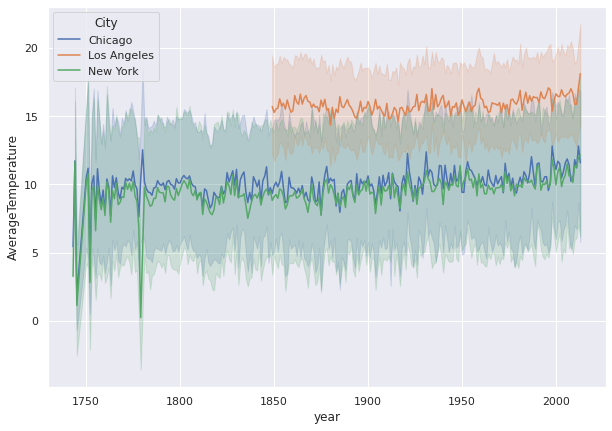

In [47]:
plt.figure(figsize=(10, 7))
sns.lineplot(x="year", y="AverageTemperature", data=df_usa_grouped, hue="City")

In [50]:
np.mean([35, 34, 36, 32, 98]) # mean doesnt work on scewed data

47.0

In [51]:
# Rolling Mean 

In [ ]:
# [34, 35, 35, 36, 37, 34, 33, 32, 36, 98]

# Rolling mean of 3 sliding window 
# [0, 0, 34.7, 35.3, ]

In [53]:
np.mean([34, 35, 35, 36, 37, 34, 33, 32, 36, 98])

41.0

In [57]:
df_temp = pd.DataFrame([34, 35, 35, 36, 37, 34, 33, 32, 36, 98], columns=["temp"])

In [59]:
df_temp.temp.rolling(3).mean()

0          NaN
1          NaN
2    34.666667
3    35.333333
4    36.000000
5    35.666667
6    34.666667
7    33.000000
8    33.666667
9    55.333333
Name: temp, dtype: float64

In [62]:
pd.concat([df_temp, df_temp.temp.rolling(3).mean()], axis=1)

temp       temp
0    34        NaN
1    35        NaN
2    35  34.666667
3    36  35.333333
4    37  36.000000
5    34  35.666667
6    33  34.666667
7    32  33.000000
8    36  33.666667
9    98  55.333333

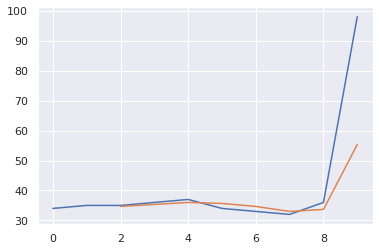

In [65]:
plt.plot(df_temp.temp)
plt.plot(df_temp.temp.rolling(3).mean())

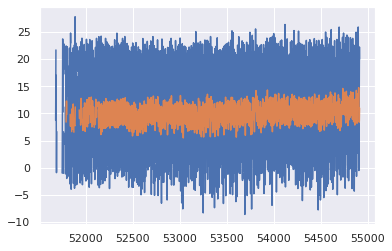

In [68]:
plt.plot(df_usa.loc[df_usa.City == "Chicago", "AverageTemperature"])
plt.plot(df_usa.loc[df_usa.City == "Chicago", "AverageTemperature"].rolling(10).mean())

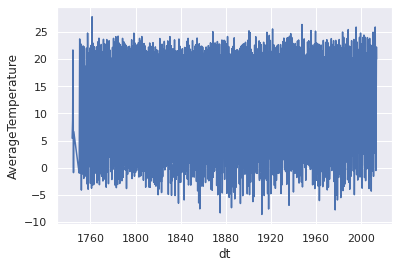

In [69]:
sns.lineplot(x="dt", y="AverageTemperature", data=df_usa.loc[df_usa.City == "Chicago"])

In [ ]:
# The mean/ std of data is stationary! 

In [ ]:
# Dickey Fuller Test - Which states whether the TS data is stationary over a time period or not! 

In [ ]:
# pip install statsmodels

In [70]:
! pip show statsmodels

Name: statsmodels
Version: 0.10.2
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: None
Author-email: None
License: BSD License
Location: /usr/local/lib/python3.7/dist-packages
Requires: pandas, scipy, patsy, numpy
Required-by: plotnine


In [71]:
from statsmodels.tsa.stattools import adfuller

In [72]:
df_la = df_usa.loc[df_usa.City == "Los Angeles"]

In [74]:
df_la.sample(10)

dt  AverageTemperature  ...  month  year
132050 1866-01-01               8.428  ...      1  1866
132565 1908-12-01               8.183  ...     12  1908
132968 1942-07-01              24.595  ...      7  1942
133151 1957-10-01              15.515  ...     10  1957
133561 1991-12-01               9.689  ...     12  1991
132955 1941-06-01              18.936  ...      6  1941
132605 1912-04-01              11.130  ...      4  1912
133318 1971-09-01              22.030  ...      9  1971
132041 1865-04-01              13.616  ...      4  1865
132704 1920-07-01              23.064  ...      7  1920

[10 rows x 9 columns]

In [79]:
adf_result = adfuller(df_la.AverageTemperature)
adf_result

(-5.491785895067122,
 2.1670713831512954e-06,
 26,
 1950,
 {'1%': -3.4337079123563106,
  '10%': -2.5675596618014462,
  '5%': -2.8630233240061367},
 6562.707106083801)

In [78]:
"ADF Stats", adf_result[0]

('ADF Stats', -5.491785895067122)

In [82]:
print("Critical Value")
for key, value in adf_result[4].items():
  print(key, round(value,3))

Critical Value
1% -3.434
5% -2.863
10% -2.568


In [83]:
adf_result[0] < adf_result[4]["5%"]

True

In [84]:
# adf stats value is less than the 5% critical value then TS is stationary 
# adf stats value is more than the 5% critical value then TS is not stationary

In [ ]:
# INPUT.  | OUTPUT
# data(t) | data(t+1)
#   35.   |  34
#   34.   |. 33
#.  33.   |  32
#.  32.   |. NA

In [ ]:
# data(Temp) | data(Temp)
# T1.        | T2
# T2.        | T3
# T3.        | T4
# T4.        | T5
# T5.        | T6
# T6.        | T7
# T7.        | NA

In [ ]:
# But what is ADF ?? 

# ADF is nothing but Linear Regression model developed on the data Vs next value of data. 
# if the ADF sees a relatioship then YES the TS is stationary other wise NO 

In [ ]:
# ARIMA - AutoRegressive Integrated Moving Average 

# AutoRegressive - regression with a lagged variable
# Interageted -   The lag taken to make TS stationary 
# Moving Average - 

In [88]:
# difference - 
pd.concat([df_temp, df_temp.diff()], axis=1)

temp  temp
0    34   NaN
1    35   1.0
2    35   0.0
3    36   1.0
4    37   1.0
5    34  -3.0
6    33  -1.0
7    32  -1.0
8    36   4.0
9    98  62.0

In [89]:
# 3 things to remember 

# p : The number of lags 

# d : The number of times the differences was taken 

# q : rolling number 

In [92]:
def dateParser(dt):
  return pd.datetime.strptime('190' + dt, "%Y-%m")

In [93]:
# ARIMA Modelling 

df2 = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv", parse_dates=[0], date_parser=dateParser)
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


Month  Sales
0 1901-01-01  266.0
1 1901-02-01  145.9
2 1901-03-01  183.1
3 1901-04-01  119.3
4 1901-05-01  180.3

In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   36 non-null     datetime64[ns]
 1   Sales   36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


In [96]:
df3 = df2.set_index("Month")

In [97]:
df3.head()

Sales
Month            
1901-01-01  266.0
1901-02-01  145.9
1901-03-01  183.1
1901-04-01  119.3
1901-05-01  180.3

In [98]:
df3.columns

Index(['Sales'], dtype='object')

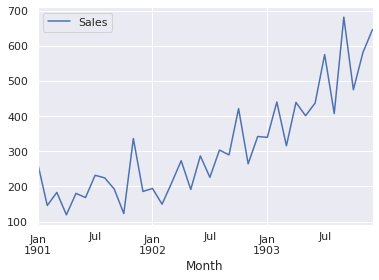

In [99]:
df3.plot()

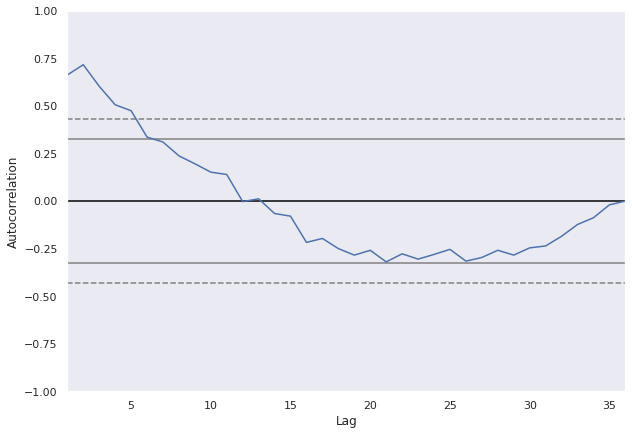

In [102]:
plt.figure(figsize=(10,7))
pd.plotting.autocorrelation_plot(df3)

In [105]:
from statsmodels.tsa.arima_model import ARIMA

In [106]:
model = ARIMA(df3, order=(5, 1, 0))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [107]:
model_fit = model.fit()

In [108]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Tue, 08 Jun 2021   AIC                            406.340
Time:                        03:31:10   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

In [109]:
# Train _ test Split 
# IN TS dont take random test train sample 

# 1901(jan) - 1903(dec)

# train 1901(jan). - 1903(sept)
# test 1903(sept). - 1903(dec)

In [110]:
# model_fit.forecast